In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
train_df = pd.read_csv(train_file_path,index_col='Complaint-ID')
test_df = pd.read_csv(test_file_path,index_col='Complaint-ID')

In [4]:
test_df['Complaint-Status'] = -1

In [5]:
complaints = pd.concat((train_df, test_df), axis=0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [6]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61809 entries, Tr-1 to Te-18543
Data columns (total 8 columns):
Company-response              29602 non-null object
Complaint-Status              61809 non-null object
Complaint-reason              61809 non-null object
Consumer-complaint-summary    61809 non-null object
Consumer-disputes             50807 non-null object
Date-received                 61809 non-null object
Date-sent-to-company          61809 non-null object
Transaction-Type              61809 non-null object
dtypes: object(8)
memory usage: 4.2+ MB


In [7]:
print(complaints['Complaint-reason'].unique())

['Loan servicing, payments, escrow account'
 'Incorrect information on credit report' 'Using a debit or ATM card'
 "Cont'd attempts collect debt not owed" 'Payoff process'
 'Loan modification,collection,foreclosure'
 'Problems caused by my funds being low'
 'Credit card protection / Debt protection' 'Managing the loan or lease'
 'Problem when making payments' 'Incorrect information on your report'
 'False statements or representation' 'Disclosure verification of debt'
 'Customer service / Customer relations' 'Improper use of your report'
 'Deposits and withdrawals' 'Communication tactics'
 'Settlement process and costs' 'Dealing with my lender or servicer'
 'Closing/Cancelling account'
 'Applying for a mortgage or refinancing an existing mortgage'
 'Problems when you are unable to pay' 'Taking out the loan or lease'
 "Charged fees or interest I didn't expect"
 "Problem with a credit reporting company's investigation into an existing problem"
 'Account opening, closing, or management' '

In [8]:
print(complaints.shape)

(61809, 8)


In [9]:
print(complaints.groupby('Complaint-reason').size())

Complaint-reason
APR or interest rate                                              254
Account opening, closing, or management                          2010
Account terms and changes                                           8
Adding money                                                       33
Advertising                                                         1
Advertising and marketing                                         257
Advertising and marketing, including promotional offers            92
Advertising, marketing or disclosures                               6
Application processing delay                                       41
Application, originator, mortgage broker                         1205
Applied for loan/did not receive money                             26
Applying for a mortgage                                            12
Applying for a mortgage or refinancing an existing mortgage       137
Arbitration                                                        29
Att

In [10]:
carray = complaints['Complaint-reason'].unique()

In [11]:
def getMap(carray) :
    count = 1
    tmap = {}
    for i in range(len(carray)):
        tmap.update({carray[i]:i})
    return tmap

In [12]:
carray = complaints['Complaint-Status'].unique()

In [13]:
getMap(carray)

{'Closed with explanation': 0,
 'Closed with non-monetary relief': 1,
 'Closed': 2,
 'Closed with monetary relief': 3,
 'Untimely response': 4,
 -1: 5}

In [14]:
def getComplaintReasonId(complaintReason) :
    map = {'Loan servicing, payments, escrow account': 0,
 'Incorrect information on credit report': 1,
 'Using a debit or ATM card': 2,
 "Cont'd attempts collect debt not owed": 3,
 'Payoff process': 4,
 'Loan modification,collection,foreclosure': 5,
 'Problems caused by my funds being low': 6,
 'Credit card protection / Debt protection': 7,
 'Managing the loan or lease': 8,
 'Problem when making payments': 9,
 'Incorrect information on your report': 10,
 'False statements or representation': 11,
 'Disclosure verification of debt': 12,
 'Customer service / Customer relations': 13,
 'Improper use of your report': 14,
 'Deposits and withdrawals': 15,
 'Communication tactics': 16,
 'Settlement process and costs': 17,
 'Dealing with my lender or servicer': 18,
 'Closing/Cancelling account': 19,
 'Applying for a mortgage or refinancing an existing mortgage': 20,
 'Problems when you are unable to pay': 21,
 'Taking out the loan or lease': 22,
 "Charged fees or interest I didn't expect": 23,
 "Problem with a credit reporting company's investigation into an existing problem": 24,
 'Account opening, closing, or management': 25,
 'Struggling to pay mortgage': 26,
 'Credit decision / Underwriting': 27,
 'Improper contact or sharing of info': 28,
 'Unable to get credit report/credit score': 29,
 'Attempts to collect debt not owed': 30,
 'Struggling to pay your loan': 31,
 'Problem with a purchase shown on your statement': 32,
 'Other': 33,
 "Can't repay my loan": 34,
 'Billing disputes': 35,
 'Making/receiving payments, sending money': 36,
 'Identity theft / Fraud / Embezzlement': 37,
 "Credit reporting company's investigation": 38,
 'Took or threatened to take negative or legal action': 39,
 'Application, originator, mortgage broker': 40,
 'Trouble using your card': 41,
 'Credit monitoring or identity protection': 42,
 'Getting a credit card': 43,
 'Managing, opening, or closing account': 44,
 'Unsolicited issuance of credit card': 45,
 'Written notification about debt': 46,
 'Problem with fraud alerts or security freezes': 47,
 'Money was taken from your bank account on the wrong day or for the wrong amount': 48,
 'Trouble during payment process': 49,
 'Getting a line of credit': 50,
 'Other features, terms, or problems': 51,
 'Problems at the end of the loan or lease': 52,
 'Unable to get your credit report or credit score': 53,
 'Struggling to repay your loan': 54,
 'Improper use of my credit report': 55,
 'Dealing with your lender or servicer': 56,
 'Advertising and marketing': 57,
 'Money was not available when promised': 58,
 'Credit monitoring or identity theft protection services': 59,
 'Fraud or scam': 60,
 'Threatened to contact someone or share information improperly': 61,
 'Charged bank acct wrong day or amt': 62,
 'Credit line increase/decrease': 63,
 'Billing statement': 64,
 'Fees': 65,
 'Delinquent account': 66,
 'Closing an account': 67,
 'Taking/threatening an illegal action': 68,
 'Other fee': 69,
 'Problem with a lender or other company charging your account': 70,
 'Managing an account': 71,
 'Balance transfer': 72,
 'Adding money': 73,
 'Disclosures': 74,
 'Unauthorized transactions/trans. issues': 75,
 'APR or interest rate': 76,
 'Other transaction problem': 77,
 'Late fee': 78,
 'Rewards': 79,
 'Transaction issue': 80,
 'Unexpected or other fees': 81,
 'Other service problem': 82,
 'Closing on a mortgage': 83,
 'Other transaction issues': 84,
 "Can't contact lender or servicer": 85,
 'Problem with additional add-on products or services': 86,
 'Sale of account': 87,
 "Can't stop charges to bank account": 88,
 'Advertising and marketing, including promotional offers': 89,
 'Fees or interest': 90,
 'Bankruptcy': 91,
 'Applying for a mortgage': 92,
 'Credit determination': 93,
 'Getting a loan': 94,
 "Received a loan you didn't apply for": 95,
 "Can't contact lender": 96,
 'Shopping for a loan or lease': 97,
 'Account terms and changes': 98,
 'Unexpected/Other fees': 99,
 "Charged fees or interest you didn't expect": 100,
 'Problem caused by your funds being low': 101,
 'Lost or stolen check': 102,
 "Received a loan I didn't apply for": 103,
 'Privacy': 104,
 'Cash advance fee': 105,
 'Problem with a purchase or transfer': 106,
 'Other service issues': 107,
 'Closing your account': 108,
 'Opening an account': 109,
 'Payment to acct not credited': 110,
 'Getting a loan or lease': 111,
 'Application processing delay': 112,
 'Convenience checks': 113,
 'Incorrect/missing disclosures or info': 114,
 'Cash advance': 115,
 'Balance transfer fee': 116,
 'Advertising, marketing or disclosures': 117,
 'Customer service/Customer relations': 118,
 'Trouble using the card': 119,
 'Applied for loan/did not receive money': 120,
 'Wrong amount charged or received': 121,
 'Arbitration': 122,
 'Forbearance / Workout plans': 123,
 'Problem adding money': 124,
 'Getting the loan': 125,
 'Struggling to pay your bill': 126,
 'Problem with customer service': 127,
 'Overdraft, savings or rewards features': 128,
 'Managing the line of credit': 129,
 'Problem getting a card or closing an account': 130,
 'Problem with the payoff process at the end of the loan': 131,
 'Unauthorized transactions or other transaction problem': 132,
 "Loan payment wasn't credited to your account": 133,
 'Excessive fees': 134,
 'Confusing or missing disclosures': 135,
 'Lender repossessed or sold the vehicle': 136,
 'Confusing or misleading advertising or marketing': 137,
 'Managing, opening, or closing your mobile wallet account': 138,
 "Problem with a company's investigation into an existing issue": 139,
 'Vehicle was repossessed or sold the vehicle': 140,
 'Credit limit changed': 141,
 'Advertising': 142,
 'Shopping for a line of credit': 143,
 'Incorrect exchange rate': 144,
 'Overlimit fee': 145,
 'Lost or stolen money order': 146,
 "Was approved for a loan, but didn't receive the money": 147,
 'Problem with an overdraft': 148,
 'Identity theft protection or other monitoring services': 149,
 'Problem with cash advance': 150,
 "Can't stop withdrawals from your bank account": 151}
    return map[complaintReason]

In [15]:
getComplaintReasonId('Loan servicing, payments, escrow account')

0

In [16]:
complaints['ComplaintReasonId'] = complaints['Complaint-reason'].map(lambda x : getComplaintReasonId(x))

In [17]:
complaints.ComplaintReasonId

Complaint-ID
Tr-1         0
Tr-2         1
Tr-3         2
Tr-4         3
Tr-5         4
Tr-6         5
Tr-7         1
Tr-8         6
Tr-9         3
Tr-10        1
Tr-11        0
Tr-12        7
Tr-13        1
Tr-14        1
Tr-15        8
Tr-16        9
Tr-17       10
Tr-18       11
Tr-19       12
Tr-20        3
Tr-21       13
Tr-22       14
Tr-23        0
Tr-24        8
Tr-25        1
Tr-26        9
Tr-27       15
Tr-28        1
Tr-29       10
Tr-30       16
            ..
Te-18514    11
Te-18515    22
Te-18516    15
Te-18517    36
Te-18518    18
Te-18519    10
Te-18520    24
Te-18521     1
Te-18522     6
Te-18523     1
Te-18524    25
Te-18525     0
Te-18526    25
Te-18527    21
Te-18528    39
Te-18529    10
Te-18530    22
Te-18531    17
Te-18532     0
Te-18533    25
Te-18534    71
Te-18535     1
Te-18536    44
Te-18537    18
Te-18538    93
Te-18539    37
Te-18540     1
Te-18541    68
Te-18542     0
Te-18543    12
Name: ComplaintReasonId, Length: 61809, dtype: int64

In [18]:
def getComplaintStatusId(status) :
    map= {'Closed with explanation': 0,
 'Closed with non-monetary relief': 1,
 'Closed': 2,
 'Closed with monetary relief': 3,
 'Untimely response': 4,
 -1: 5}
    return map[status]

In [19]:
complaints['ComplaintStatusId'] = complaints['Complaint-Status'].map(lambda x : getComplaintStatusId(x))

In [20]:
complaints.ComplaintStatusId

Complaint-ID
Tr-1        0
Tr-2        1
Tr-3        0
Tr-4        0
Tr-5        0
Tr-6        0
Tr-7        0
Tr-8        0
Tr-9        0
Tr-10       1
Tr-11       0
Tr-12       0
Tr-13       1
Tr-14       0
Tr-15       2
Tr-16       3
Tr-17       0
Tr-18       0
Tr-19       0
Tr-20       0
Tr-21       0
Tr-22       0
Tr-23       0
Tr-24       0
Tr-25       0
Tr-26       0
Tr-27       0
Tr-28       0
Tr-29       0
Tr-30       0
           ..
Te-18514    5
Te-18515    5
Te-18516    5
Te-18517    5
Te-18518    5
Te-18519    5
Te-18520    5
Te-18521    5
Te-18522    5
Te-18523    5
Te-18524    5
Te-18525    5
Te-18526    5
Te-18527    5
Te-18528    5
Te-18529    5
Te-18530    5
Te-18531    5
Te-18532    5
Te-18533    5
Te-18534    5
Te-18535    5
Te-18536    5
Te-18537    5
Te-18538    5
Te-18539    5
Te-18540    5
Te-18541    5
Te-18542    5
Te-18543    5
Name: ComplaintStatusId, Length: 61809, dtype: int64

In [21]:
complaints = complaints[['ComplaintStatusId','ComplaintReasonId']]

In [22]:
complaints

,ComplaintStatusId,ComplaintReasonId
Complaint-ID,,
Tr-1,0,0
Tr-2,1,1
Tr-3,0,2
Tr-4,0,3
Tr-5,0,4
Tr-6,0,5
Tr-7,0,1
Tr-8,0,6
Tr-9,0,3


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

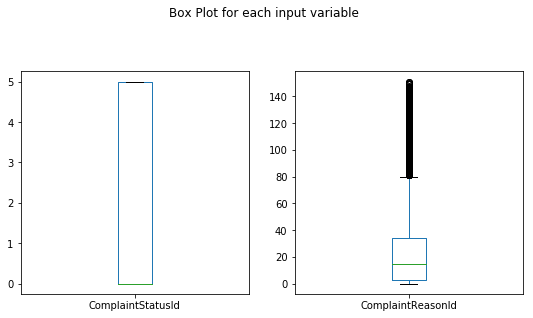

In [29]:
complaints.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.show()

In [31]:
import pylab as pl
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('complaints_hist')
plt.show()

<Figure size 432x288 with 0 Axes>

In [25]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path,'train.csv')
write_test_path = os.path.join(processed_data_path,'test.csv')

In [32]:
complaints.loc[complaints.ComplaintStatusId != -1].to_csv(write_train_path)
columns = [column for column in complaints.columns if column !='ComplaintStatusId']
complaints.loc[complaints.ComplaintStatusId == --1,columns].to_csv(write_test_path)

In [33]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
train_file_path = os.path.join(processed_data_path,'train.csv')
test_file_path = os.path.join(processed_data_path,'test.csv')

In [34]:
train_df = pd.read_csv(train_file_path,index_col='Complaint-ID')
test_df = pd.read_csv(test_file_path,index_col='Complaint-ID')

In [35]:
train_df.info()
X = train_df[['ComplaintReasonId','ComplaintStatusId']]
y = train_df['ComplaintStatusId']

<class 'pandas.core.frame.DataFrame'>
Index: 61809 entries, Tr-1 to Te-18543
Data columns (total 2 columns):
ComplaintStatusId    61809 non-null int64
ComplaintReasonId    61809 non-null int64
dtypes: int64(2)
memory usage: 1.4+ MB


In [36]:
print (X.shape,y.shape)

(61809, 2) (61809,)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(49447, 2) (49447,)
(12362, 2) (12362,)


In [ ]:
print('mean survival in train {0:.3f}'.format(np.mean(y_train)))
print('mean survival in test {0:.3f}'.format(np.mean(y_test)))

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.95


In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 1.00
Accuracy of LDA classifier on test set: 1.00


In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


In [45]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 1.00


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[6931    0    0    0    0    0]
 [   0  922    0    0    0    0]
 [   0    0  161    0    0    0]
 [   0    0    0  550    0    0]
 [   0    0    0    0   71    0]
 [   0    0    0    0    0 3727]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      6931
          1       1.00      1.00      1.00       922
          2       1.00      1.00      1.00       161
          3       1.00      1.00      1.00       550
          4       1.00      1.00      1.00        71
          5       1.00      1.00      1.00      3727

avg / total       1.00      1.00      1.00     12362

